# Coursework B: MNIST Classification Using TensorFlow and Keras
## Archie Wilson, Student Number: 22008424
The following notebook aims to investigate how random noise added to each pixel affects a neural network trained and tested with MNIST handwritten digits. The model will first be trained using the original clean MNIST dataset and then tested on images with varying noise levels. A new model will then be trained on a noisy dataset, and the impact on image classification between the two models will be discussed.

In [2]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Set figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0]    # Figure size in inches
mpl.rcParams['figure.dpi']=200    # 200 dots per inch

# Import MNIST and Add Noise to the Dataset

In [3]:
# Import the MNIST dataset from Keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalise the values in the dataset
train_images=train_images/255.0
test_images=test_images/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
def addNoiseToMNIST(yNoise,data):
  """This function adds random noise to the MNIST dataset drawn from a uniform distribution with values between 0 and yNoise

  Inputs:    yNoise           maximum noise distribution per pixel
             data             the MNIST dataset

  Outputs:   dataWithNoise    the MNIST dataset with random noise added to each pixel
  """

  # Generate random noise from a uniform distribution for each pixel
  noise = np.random.uniform(0, yNoise, size=data.shape)

  # Convert back to original data values before adding noise
  data = data * 255.0

  # Add noise to the dataset
  dataWithNoise = data + noise

  # Check that no pixel has a value above 255
  dataWithNoise = np.clip(dataWithNoise,0,255)

  # Normalise the noisy dataset
  dataWithNoise = dataWithNoise / 255.0

  # Return dataset with random noise added
  return dataWithNoise

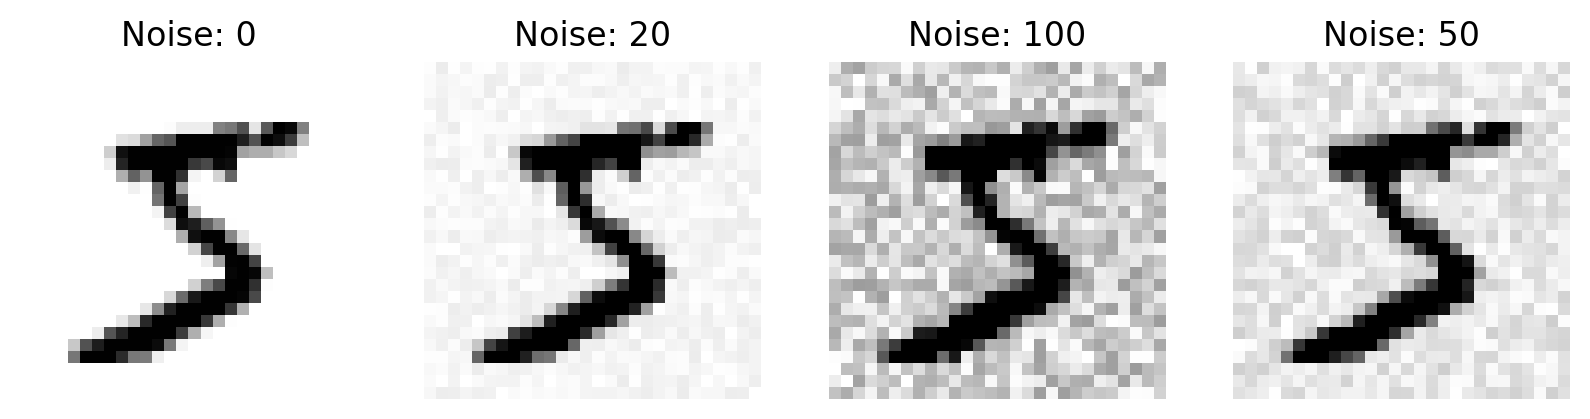

In [7]:
# Select a sample image
sample_image = train_images[0]

# Define noise levels
yNoise = np.array([0, 20, 100, 50])

# Generate and plot images with different noise levels
fig, axes = plt.subplots(1, len(yNoise), figsize=(10, 5))
for i, noise in enumerate(yNoise):
    dataNoise = addNoiseToMNIST(noise, sample_image)
    axes[i].imshow(dataNoise, cmap='binary')
    axes[i].set_title(f'Noise: {noise}')
    axes[i].axis('off')

plt.show()

# Train a Neural Network to Classify Handwritten Digits

In [ ]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),    # 28x28 image in input layer
    keras.layers.Flatten(),    # Convert 28x28 image into a 784-element vector
    keras.layers.Dense(128,activation='relu'),    # 128 nodes in hidden layer
    keras.layers.Dense(10)    # 10 nodes in output layer for digits 0-9
])

In [ ]:
# Compile the neural network
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])    # Use cross-entropy loss function and stochastic gradient descent

In [ ]:
# Training the neural network
history=model.fit(train_images, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7822 - loss: 0.6922
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9609 - loss: 0.1307
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9702 - loss: 0.0947
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9754 - loss: 0.0766
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9780 - loss: 0.0715
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0571
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0500
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0434
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0403
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0345
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9914 - loss: 0.0278
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [ ]:
# Check shape of test_images
print(np.shape(test_images))

# Evaluate the model and display accuracy on test images
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 0s - 2ms/step - accuracy: 0.9771 - loss: 0.1249

Test accuracy: 0.9771000146865845


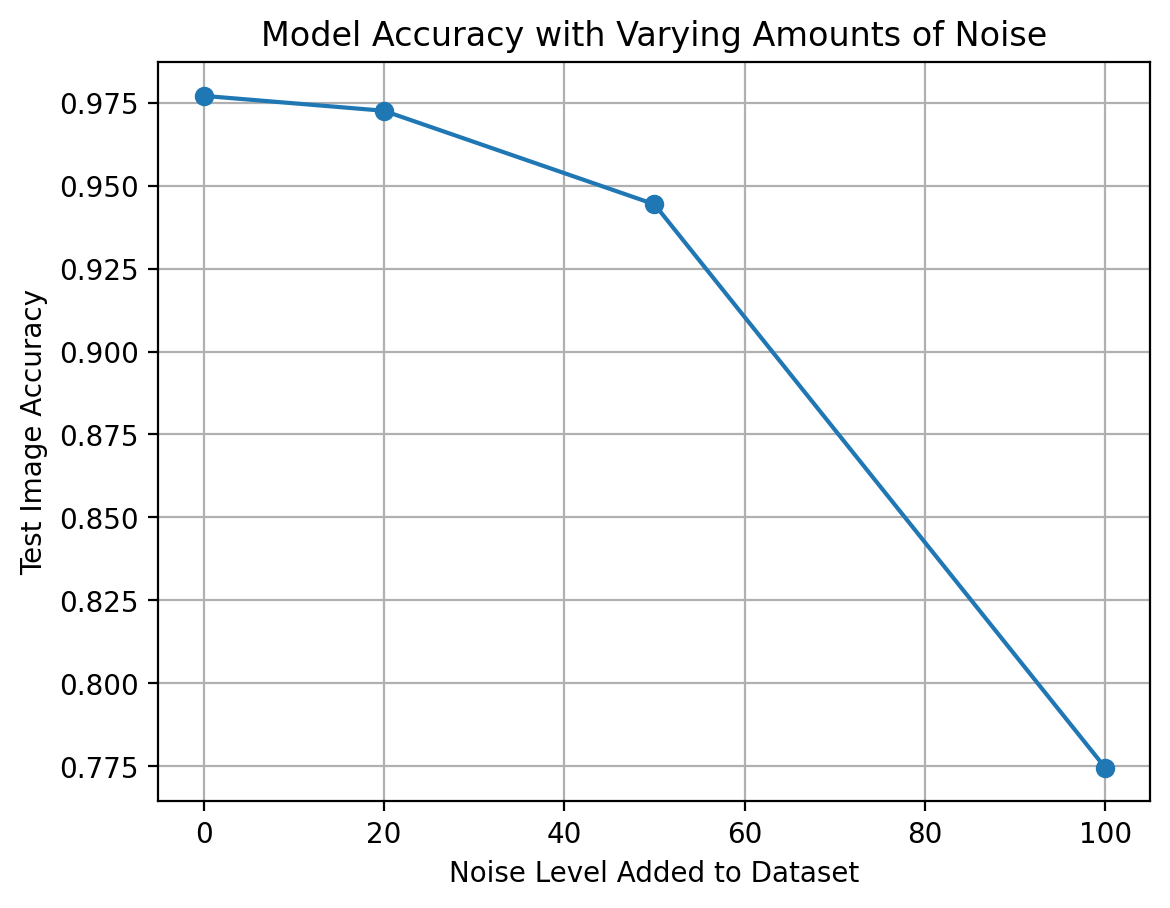

In [ ]:
# Store accuracy results
accuracies = []

# Sort yNoise for plotting
yNoise_sort = np.sort(yNoise)

for noise in yNoise_sort:
    dataNoise_test = addNoiseToMNIST(noise, test_images)    # Add noise to test data
    test_loss, test_acc = model.evaluate(dataNoise_test, test_labels, verbose=0)    # Evaluate model on noisy data
    accuracies.append(test_acc)

# Plot test accuracy vs noise level
plt.plot(yNoise_sort, accuracies, marker='o', linestyle='-')
plt.xlabel("Noise Level Added to Dataset")
plt.ylabel("Test Image Accuracy")
plt.title("Model Accuracy with Varying Amounts of Noise")
plt.grid()
plt.show()

# Training With a Noisy Dataset

In [ ]:
# Start with a noisy training set
train_images_with_noise = addNoiseToMNIST(20, train_images)    # Set the noise level to 20

# Define the new neural network model
model_2 = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compile the neural network
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

# Training the neural network
history=model_2.fit(train_images_with_noise, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7690 - loss: 0.7280
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9538 - loss: 0.1481
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9673 - loss: 0.1077
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0917
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9747 - loss: 0.0783
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0673
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9805 - loss: 0.0629
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9846 - loss: 0.0497
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0439
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9848 - loss: 0.0459
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0393
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

In [ ]:
# Evaluate the model and display accuracy on test images
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 2ms/step - accuracy: 0.9757 - loss: 0.1496

Test accuracy: 0.9757000207901001


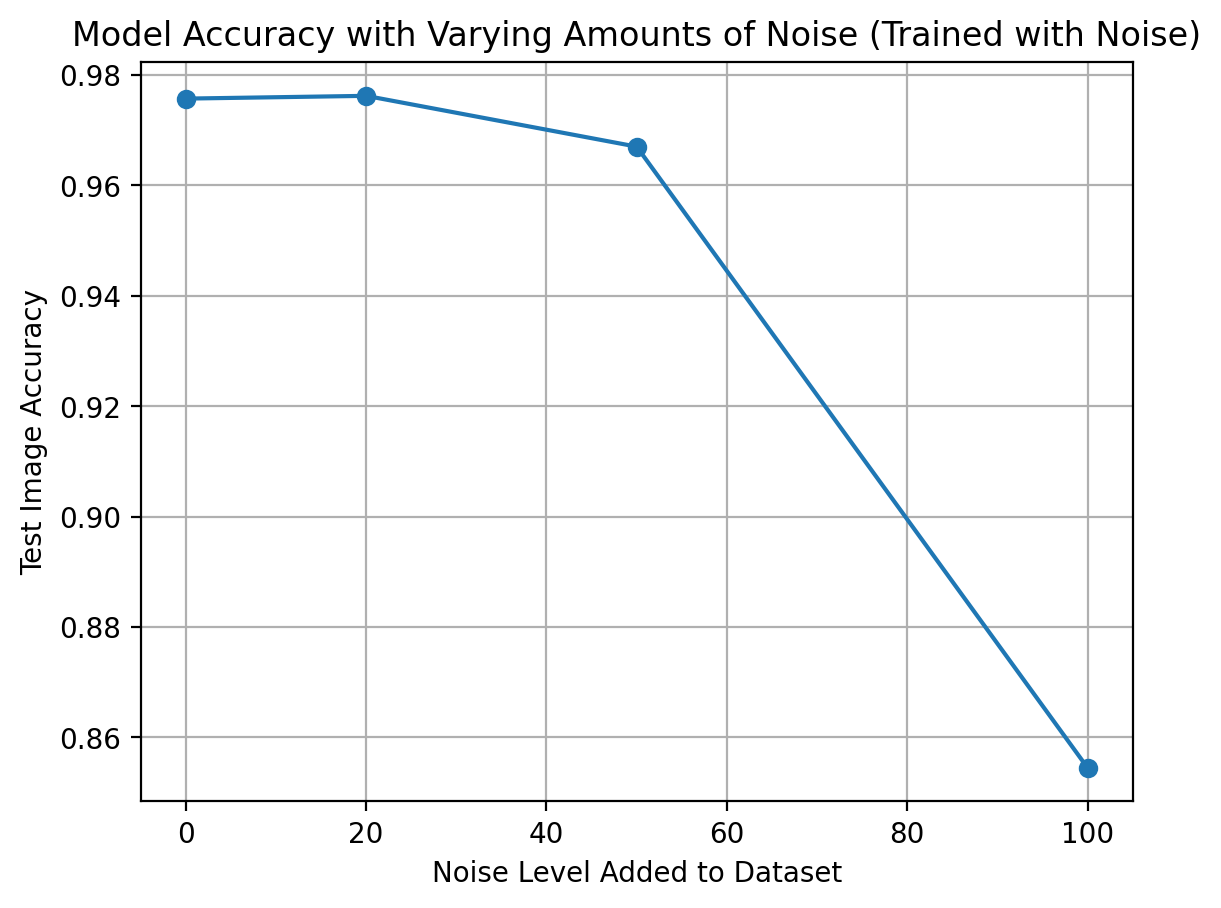

In [ ]:
# Store accuracy results
accuracies = []

for noise in yNoise_sort:
    dataNoise_test = addNoiseToMNIST(noise, test_images)    # Add noise to test data
    test_loss, test_acc = model_2.evaluate(dataNoise_test, test_labels, verbose=0)    # Evaluate model on noisy data
    accuracies.append(test_acc)

# Plot test accuracy vs noise level
plt.plot(yNoise_sort, accuracies, marker='o', linestyle='-')
plt.xlabel("Noise Level Added to Dataset")
plt.ylabel("Test Image Accuracy")
plt.title("Model Accuracy with Varying Amounts of Noise (Trained with Noise)")
plt.grid()
plt.show()

# Adding Too Much Noise

In [ ]:
# Start with a noisy training set
train_images_with_noise = addNoiseToMNIST(50, train_images)    # Set the noise level to 50

# Define the new neural network model
model_3 = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compile the neural network
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

# Training the neural network
history=model_3.fit(train_images_with_noise, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2161 - loss: 2.2528
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1717 - loss: 2.1703
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1228 - loss: 2.2745
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1069 - loss: 2.3040
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1083 - loss: 2.3021
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1096 - loss: 2.3035
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1052 - loss: 2.3035
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1067 - loss: 2.3042
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1084 - loss: 2.3034
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1034 - loss: 2.3036
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1104 - loss: 2.3034
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

In [ ]:
# Evaluate the model and display accuracy on test images
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.1217 - loss: 2.2656

Test accuracy: 0.1216999962925911


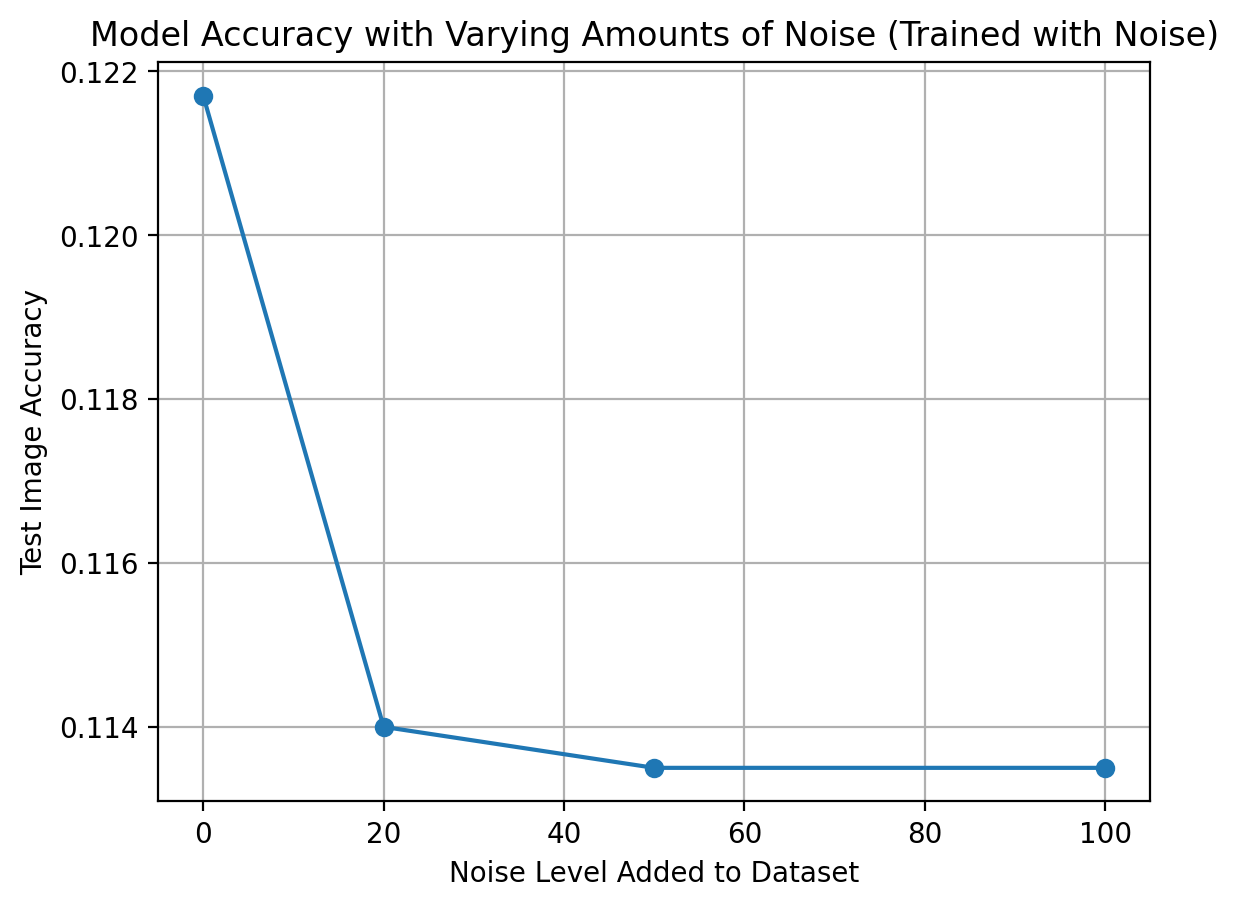

In [ ]:
# Store accuracy results
accuracies = []

for noise in yNoise_sort:
    dataNoise_test = addNoiseToMNIST(noise, test_images)    # Add noise to test data
    test_loss, test_acc = model_3.evaluate(dataNoise_test, test_labels, verbose=0)    # Evaluate model on noisy data
    accuracies.append(test_acc)

# Plot test accuracy vs noise level
plt.plot(yNoise_sort, accuracies, marker='o', linestyle='-')
plt.xlabel("Noise Level Added to Dataset")
plt.ylabel("Test Image Accuracy")
plt.title("Model Accuracy with Varying Amounts of Noise (Trained with Noise)")
plt.grid()
plt.show()

If we define performance as the model's ability to classify the handwritten digits from the original MNIST dataset, then the best noise level added to the training set would be zero. This means that there would be no artificial interference in trying to identify the digits, and so it should allow the model to achieve the highest level of accuracy. If, however, the model is to be used in real-world applications, we might define performance as its robustness to noise. This could be due to trying to read a bank cheque with some defect or dirt, which could be interpreted as some added noise to the handwritten digits. Training the data with a low level of noise added meant that tested images with low levels of noise were identified more accurately than clean images, and the heavily noisy images were identified correctly more often than when the model was trained on the clean dataset. I found that if a high noise level (> 50) was used in the training data, the model performed especially poorly and could only correctly identify 10% to 15% of the test images. This is because after adding too much noise, the model starts to overfit to the noise and then struggles to understand the difference between the noise and the digit.